In [ ]:
import csv
import pandas as pd
import regex as re
import numpy as np
import scipy 

In [ ]:
war=pd.read_csv('war_dataset.csv')
politics = pd.read_csv('politics_dataset.csv')
religion = pd.read_csv('religion_dataset.csv')
crisis = pd.read_csv('crisis_dataset.csv')
health = pd.read_csv('health.csv',encoding='cp1252')

data=[war,politics,religion,crisis,health]

In [ ]:
li=['war','politics','religion','crisis','health']

In [ ]:
war.head()

,Unnamed: 0,ID,Tweet content,User,Urls list,Hyperlinks_exist,Media_exists,Hashtags list,@ list,ID.1,created_at,Compound,Subjectivity,Favorites_count,Retweet_count,Replies count,Classification,Sentiment
0,0,1,“I dont Know if the world really gives equal a...,airnewsalerts,NaN,no,yes,Ukraine,NaN,1.514308e+18,2022-04-13 18:22:35+00:00,0.1397,0.301190,958,729,63,Information,neutral
1,1,2,Zelenskyy called on countries to urgently prov...,nexta_tv,NaN,no,yes,Ukraine,NaN,1.514281e+18,2022-04-13 16:34:02+00:00,0.1280,0.000000,4349,866,96,Information,neutral
2,2,3,"In Tallinn, women gathered in front of the Rus...",KyivPost,NaN,no,yes,Ukraine,NaN,1.514203e+18,2022-04-13 11:25:13+00:00,-0.7579,0.000000,3518,1185,61,Misinformation,negative
3,3,4,"🙏🕯️Volodymyr Balyuk, Sergeant of the @ArmedFor...",armyinformcomua,NaN,no,yes,Ukraine,ArmedForcesUkr,1.514309e+18,2022-04-13 18:27:54+00:00,0.5848,1.000000,10120,1063,257,Information,positive
4,4,5,Every time I see new testimony on #Russia sold...,lesiavasylenko,NaN,no,no,Russia Ukraine,NaN,1.514341e+18,2022-04-13 20:32:08+00:00,0.5423,0.227273,4541,714,166,Information,positive


In [ ]:

dat = dict()

for j in range(len(data)):
  icn,mcn=0,0
  info,mis=[],[]
  ip,mp,ineg,mneg,ineu,mneu=0,0,0,0,0,0

  for i in range(len(data[j])):
    if(data[j].loc[i]['Classification']=='Information'):
      if(data[j].loc[i]['Sentiment'] == 'positive'):
        ip+=1

      elif(data[j].loc[i]['Sentiment']=='negative'):
        ineg+=1
      
      elif(data[j].loc[i]['Sentiment']=='neutral'):
        ineu+=1

    elif(data[j].loc[i]['Classification']=='Misinformation'):
      if(data[j].loc[i]['Sentiment'] == 'positive'):
        mp+=1

      elif(data[j].loc[i]['Sentiment']=='negative'):
        mneg+=1
      
      elif(data[j].loc[i]['Sentiment']=='neutral'):
        mneu+=1


  dat[li[j]]=[ip,ineg,ineu,mp,mneg,mneu]


In [ ]:
dat

{'crisis': [14, 11, 25, 2, 8, 0],
 'health': [10, 11, 18, 5, 2, 0],
 'politics': [25, 15, 34, 9, 9, 0],
 'religion': [13, 20, 14, 13, 17, 0],
 'war': [12, 9, 25, 3, 6, 0]}

In [ ]:
li=[['crisis',len(crisis)]+dat['crisis'],['health',len(health)]+dat['health'],['politics',len(politics)]+dat['politics'], ['religion',len(religion)]+dat['religion'],['war',len(war)]+dat['war'] ]
df= pd.DataFrame(li, columns=('topic','number','positive','negative','neutral','mis positive', 'mis negative', 'mis neutral'))

In [ ]:
df

,topic,number,positive,negative,neutral,mis positive,mis negative,mis neutral
0,crisis,60,14,11,25,2,8,0
1,health,50,10,11,18,5,2,0
2,politics,92,25,15,34,9,9,0
3,religion,77,13,20,14,13,17,0
4,war,55,12,9,25,3,6,0


In [ ]:
true =df[['topic','positive','negative','neutral']]

In [ ]:
true

,topic,positive,negative,neutral
0,crisis,14,11,25
1,health,10,11,18
2,politics,25,15,34
3,religion,13,20,14
4,war,12,9,25


In [ ]:
mis=df[['topic','mis positive','mis negative','mis neutral']]

In [ ]:
mis

,topic,mis positive,mis negative,mis neutral
0,crisis,2,8,0
1,health,5,2,0
2,politics,9,9,0
3,religion,13,17,0
4,war,3,6,0


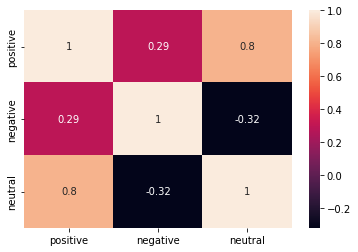

In [ ]:
cor_true=true.corr()
sn.heatmap(cor_true, annot=True)
plt.show()


<function matplotlib.pyplot.show>

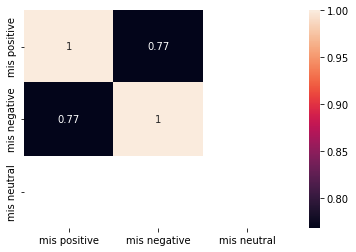

In [ ]:
cor_mis = mis.corr()
sn.heatmap(cor_mis,annot=True)
plt.show

Text(0, 0.5, 'Misinformation positive')

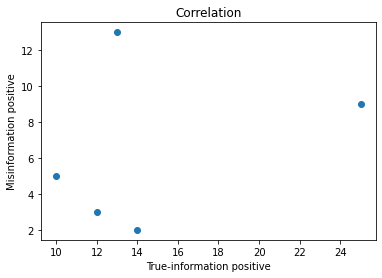

In [ ]:

import matplotlib.pyplot as plt
plt.title('Correlation')

# plot the data
x=true['positive']
y=mis['mis positive']

plt.scatter(x, y)

# Labelling axes
plt.xlabel('True-information positive')
plt.ylabel('Misinformation positive')


Text(0, 0.5, 'Misinformation neutral')

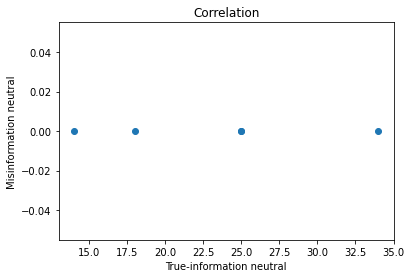

In [ ]:
import matplotlib.pyplot as plt
plt.title('Correlation')

# plot the data
x=true['neutral']
y=mis['mis neutral']

plt.scatter(x, y)

# Labelling axes
plt.xlabel('True-information neutral')
plt.ylabel('Misinformation neutral')


Text(0, 0.5, 'Misinformation negative')

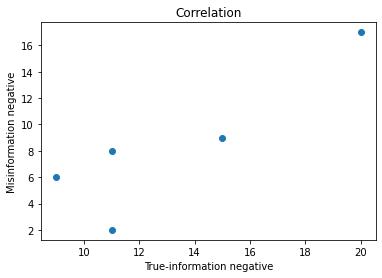

In [ ]:
import matplotlib.pyplot as plt
plt.title('Correlation')

# plot the data
x=true['negative']
y=mis['mis negative']

plt.scatter(x, y)

# Labelling axes
plt.xlabel('True-information negative')
plt.ylabel('Misinformation negative')
